In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [30]:

 # Load the datasets
true_data = pd.read_csv("X:\Code\ML\True.csv")
fake_data = pd.read_csv("X:\Code\ML\Fake.csv")

# Add a label column to each dataset
true_data['label'] = 1  # 1 for true news
fake_data['label'] = 0  # 0 for fake news

#convert string data to int
true_data["title"] = true_data["title"].astype('category')
true_data["title"] = true_data["title"].cat.codes
fake_data["title"] = fake_data["title"].astype('category')
fake_data["title"] = fake_data["title"].cat.codes


true_data["text"] = true_data["text"].astype('category')
true_data["text"] = true_data["text"].cat.codes
fake_data["text"] = fake_data["text"].astype('category')
fake_data["text"] = fake_data["text"].cat.codes


true_data["subject"] = true_data["subject"].astype('category')
true_data["subject"] = true_data["subject"].cat.codes
fake_data["subject"] = fake_data["subject"].astype('category')
fake_data["subject"] = fake_data["subject"].cat.codes

#drop null values
true_data = true_data.dropna()
fake_data = fake_data.dropna()

# Combine the datasets
combined_data = pd.concat([true_data, fake_data], ignore_index=True)

# Define X and y
X = combined_data[['title', 'text']]  # Using 'Title' and 'Text' as features
y = combined_data['label']  # Using 'label' as the target variable


              # # Preprocess the text data (e.g., tokenization, lowercasing, etc.)
              # # For simplicity, let's assume we're using TF-IDF for vectorization
              # tfidf_vectorizer = TfidfVectorizer()
              # X_tfidf = tfidf_vectorizer.fit_transform(X['Title'] + ' ' + X['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
import math

def train_model(X, y, num_epochs=100, learning_rate=0.6, lambda_=0.1):
    # Initialize model parameters
    global w
    w = np.zeros((X.shape[1],))
    global b
    b = 0.0

    # Training loop
    for epoch in range(num_epochs):
        # Compute cost and gradients
        cost = compute_cost_logistic_reg(X, y, w, b, lambda_)
        dj_db, dj_dw = compute_gradient_logistic_reg(X, y, w, b, lambda_)

        # Update parameters
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        # Print progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    print("Training finished.")
train_model(X_train_scaled,y_train.values)

def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
  """
  Computes the gradient for linear regression 

  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters  
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
  Returns
    dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
    dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
  """
  m,n = X.shape
  dj_dw = np.zeros((n,))                            #(n,)
  dj_db = 0.0                                       #scalar

  for i in range(m):
      f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
      err_i  = f_wb_i  - y[i]                       #scalar
      for j in range(n):
          dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
      dj_db = dj_db + err_i
  dj_dw = dj_dw/m                                   #(n,)
  dj_db = dj_db/m                                   #scalar

  for j in range(n):
      dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
  return dj_db, dj_dw 
  
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
    
def compute_cost_logistic_reg(X, y, w, b, lambda_):
  """
  Computes the cost over all examples
  Args:
  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters  
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
  Returns:
    total_cost (scalar):  cost 
  """

  m,n  = X.shape
  cost = 0.
  for i in range(m):
      z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
      f_wb_i = sigmoid(z_i)                                          #scalar
      cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
            
  cost = cost/m                                                      #scalar

  reg_cost = 0
  for j in range(n):
      reg_cost += (w[j]**2)                                          #scalar
  reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

  total_cost = cost + reg_cost                                       #scalar
  return total_cost


Epoch 0: Cost = 0.6931471805594782
Epoch 10: Cost = 0.6752595665131659
Epoch 20: Cost = 0.6745201343846068
Epoch 30: Cost = 0.674482254086058
Epoch 40: Cost = 0.6744800804977424
Epoch 50: Cost = 0.6744799475394404
Epoch 60: Cost = 0.6744799391087588
Epoch 70: Cost = 0.6744799385635619
Epoch 80: Cost = 0.6744799385279209
Epoch 90: Cost = 0.6744799385255857
Training finished.


Accuracy: 0.5178173719376392
Confusion Matrix:
[[4650    0]
 [4330    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4650
           1       0.00      0.00      0.00      4330

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.35      8980



X:\Softwares\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
X:\Softwares\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
X:\Softwares\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


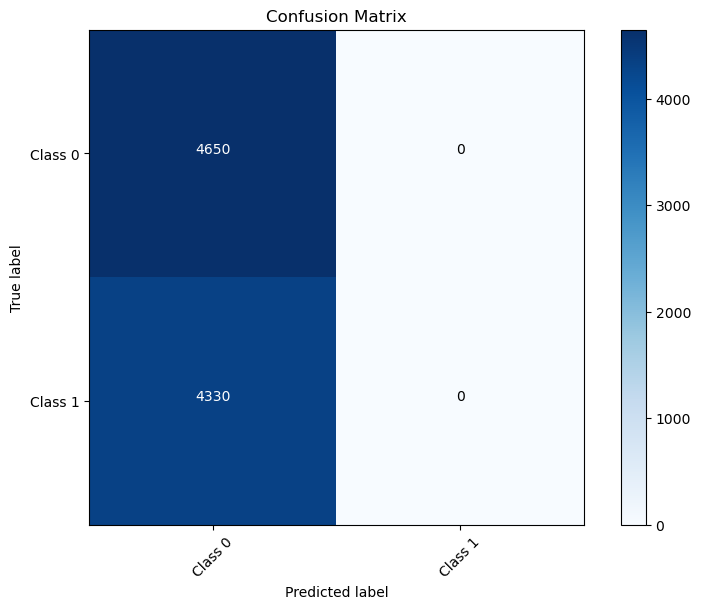

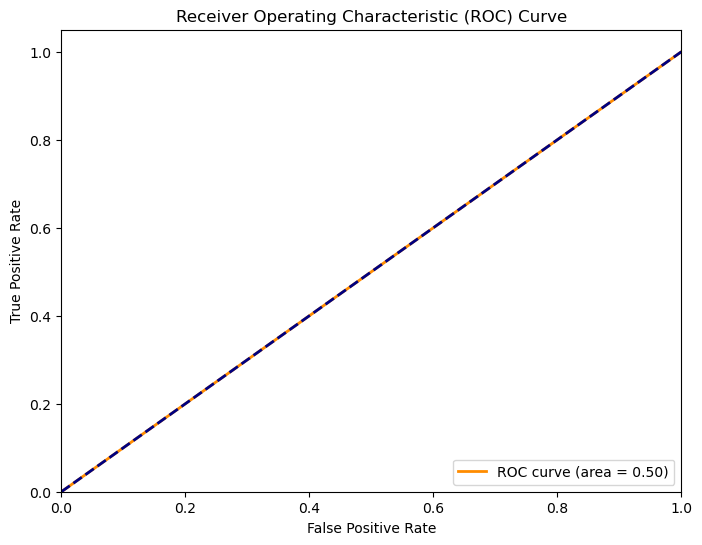

In [53]:

import itertools
# 1. Prepare Test Data (Assuming you have X_test_scaled and y_test)
# This step should match the preprocessing steps you applied to your training data.

# 2. Predictions
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return np.array(y_pred, dtype=int)

y_pred = predict(X_test_scaled, w, b)

# 3. Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example evaluation metric: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# 4. Visualization (Optional)
# You can visualize the results using matplotlib, seaborn, or other plotting libraries.
# For example, plotting the confusion matrix or ROC curve.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Confusion Matrix Visualization
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plot_confusion_matrix(conf_matrix, classes=['Class 0', 'Class 1'],
                      title='Confusion Matrix')

# ROC Curve Visualization
def plot_roc_curve(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming y_test and y_pred are probability scores for class 1
plot_roc_curve(y_test, y_pred)
